In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import image_dataset_from_directory, array_to_img 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
#image_dataset_from_directory is used for to load images directly and label them based on the subdirectory structure.
# array_to_img  is used for array to image conversion

from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import Sequential

In [2]:
dataset_dir = r'Brain Tumor'

In [3]:
# Load dataset with split
train_dataset = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,  # 20% for validation
    subset="training",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)
#image_dataset_from_directory is used for to load images directly and label them based on the subdirectory structure.

Found 253 files belonging to 2 classes.
Using 203 files for training.


In [4]:
test_dataset = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(224, 224),
    batch_size=32
)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [5]:
class_names = train_dataset.class_names # To get the name as a class name that will be store in the dataset
class_names    # 0 = non-tumor/no and  1 = tumor/yes 

['no', 'yes']

# Visualize Sample Images

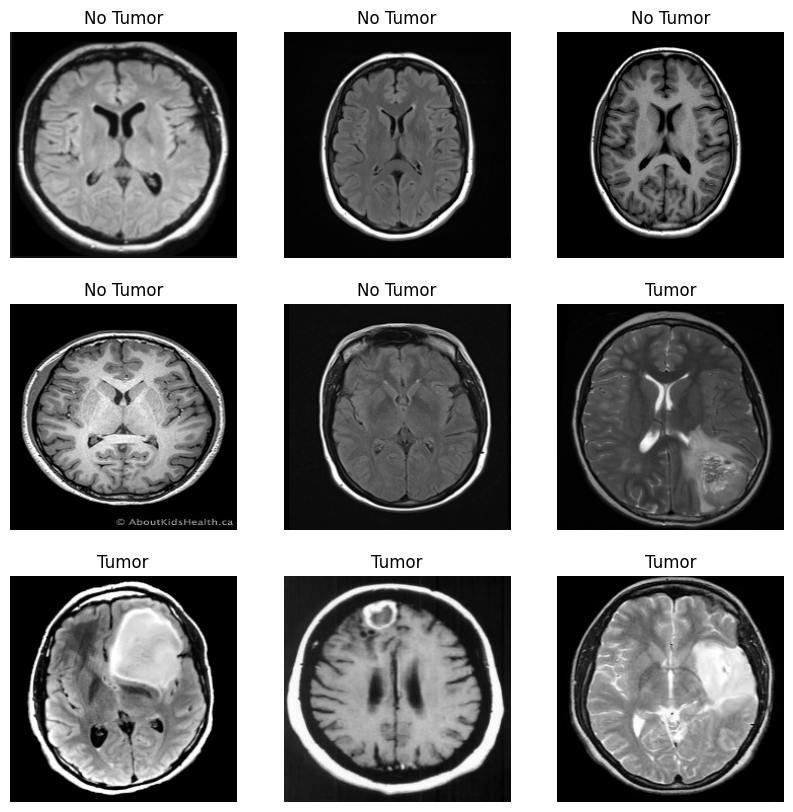

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):  # Take only first batch from 32 batches
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(array_to_img(images[i]))
        plt.title("Tumor" if labels[i] == 1 else "No Tumor")
        plt.axis("off")
plt.show()

# Preproceesing and Normalize the data

In [7]:
# lets normalize the pixel values to [0, 1]
normalization_layer = Rescaling(1./255)

In [8]:
# x represents the images in the dataset.
# y represents the corresponding labels.
#  .map() is using to ensure every image is normalized before it is fed into the model.
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [9]:
# Data augmentation - create data augmentation for modify the input images during training
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2) 
])

In [10]:
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
# The training=True argument ensures that is only applied during training

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),  # Converts the multi-dimensional feature maps into a 1D vector.
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Using binary cross-entropy because the data is binary classification
    metrics=['accuracy']
)


In [15]:
# Train the model
history = model.fit(train_dataset, validation_data=test_dataset,  epochs=20  
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 665ms/step - accuracy: 0.6132 - loss: 1.3941 - val_accuracy: 0.7600 - val_loss: 0.5686
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 605ms/step - accuracy: 0.7221 - loss: 0.5750 - val_accuracy: 0.7800 - val_loss: 0.5536
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 608ms/step - accuracy: 0.6722 - loss: 0.6217 - val_accuracy: 0.7200 - val_loss: 0.5417
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 612ms/step - accuracy: 0.7402 - loss: 0.5670 - val_accuracy: 0.6800 - val_loss: 0.5388
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 609ms/step - accuracy: 0.7989 - loss: 0.4943 - val_accuracy: 0.7400 - val_loss: 0.5387
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 620ms/step - accuracy: 0.7482 - loss: 0.5439 - val_accuracy: 0.7600 - val_loss: 0.5395
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 599ms/step - accuracy: 0.6744 - loss: 0.6187 - val_accuracy: 0.7400 - val_loss: 0.5365
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.7235 - loss: 0.5590 - val_accuracy: 0.7800 - val_loss:

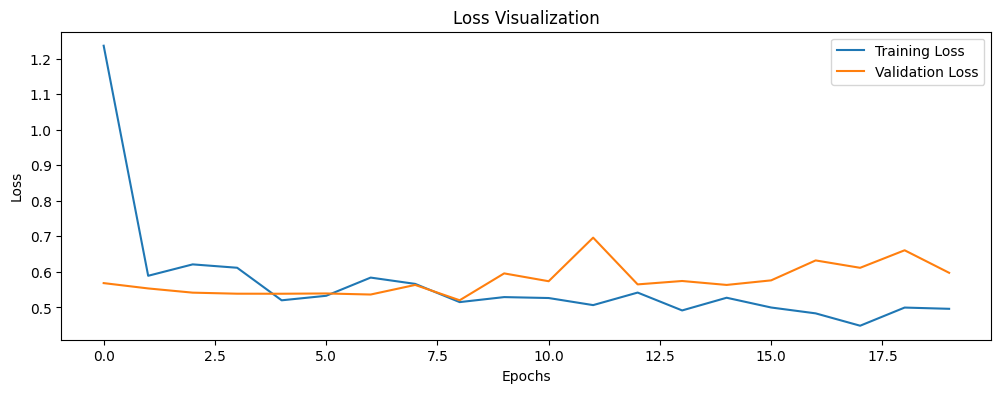

In [16]:
plt.figure(figsize=(12, 4))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

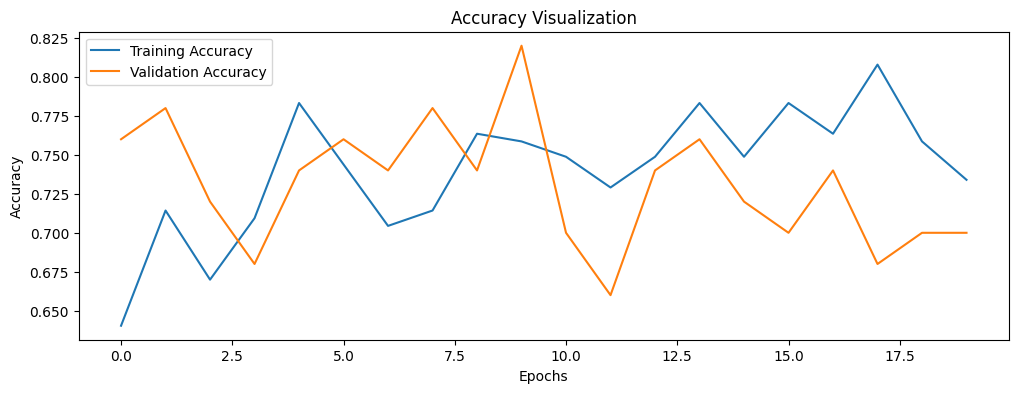

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [20]:
val_loss, val_accuracy = model.evaluate(test_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6958 - loss: 0.5940
Validation Loss: 0.5975344181060791
Validation Accuracy: 0.699999988079071


In [21]:
# 0 = no tumor and  1 = tumor detected

def image_predictor(img_path):
    img = load_img(img_path, target_size=(224,224))
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0) 
    # Predict
    prediction = model.predict(img_array)

    # Print predictions
    print(f"Prediction: {prediction[0][0]}")

    threshold = 0.5  # Default threshold
    if prediction[0][0] > threshold:
        print("Tumor Detected")
    else:
        print("No Tumor")

In [22]:
image_predictor(r"C:\Users\Bhagyashri Rade\Desktop\Analytics\AI\AI Project\brain_tumor_dataset\yes\Y30.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Prediction: 0.7151394486427307
Tumor Detected


In [23]:
image_predictor(r"C:\Users\Bhagyashri Rade\Desktop\Analytics\AI\AI Project\brain_tumor_dataset\yes\Y16.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Prediction: 0.16980977356433868
No Tumor


In [24]:
image_predictor(r"C:\Users\Bhagyashri Rade\Desktop\Analytics\AI\AI Project\Brain Tumor\no\15 no.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: 0.8181179761886597
Tumor Detected


In [25]:
image_predictor(r"C:\Users\Bhagyashri Rade\Desktop\Analytics\AI\AI Project\brain_tumor_dataset\no\34 no.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction: 0.16772675514221191
No Tumor


In [26]:
image_predictor(r"C:\Users\Bhagyashri Rade\Desktop\Analytics\AI\AI Project\brain_tumor_dataset\yes\Y102.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction: 0.5844264030456543
Tumor Detected


In [27]:
image_predictor(r"C:\Users\Bhagyashri Rade\Desktop\Analytics\AI\AI Project\Brain Tumor\no\no 95.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: 0.1446761041879654
No Tumor


In [28]:
image_predictor(r"C:\Users\Bhagyashri Rade\Desktop\Analytics\AI\AI Project\brain_tumor.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Prediction: 0.18932032585144043
No Tumor


In [29]:
image_predictor(r"C:\Users\Bhagyashri Rade\Desktop\Analytics\AI\AI Project\tumor.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: 0.19839578866958618
No Tumor


In [30]:
image_predictor(r"C:\Users\Bhagyashri Rade\Desktop\Analytics\AI\AI Project\no_tumor.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Prediction: 0.21908186376094818
No Tumor
